### Ridge Regression – Simple Explanation (Roman Urdu Mein)

**Ridge Regression** ek modified form of **linear regression** hoti hai jo overfitting ko control karne ke liye use hoti hai. Jab humara model **overfit** karta hai (matlab, training data ko bohot achi tarah fit karta hai lekin testing data pe acha perform nahi karta), to Ridge Regression ek penalty term ko add karke is problem ko solve karta hai.

### Ridge Regression Ka Formula:
$
y = b + m_1x_1 + m_2x_2 + ... + m_nx_n
$
Lekin Ridge Regression mein hum **penalty** add karte hain jo model ke weights (coefficients) ko limit karta hai:

$
Cost = Loss + \lambda \sum_{i=1}^{n} m_i^2
$

Yahan par **λ** (lambda) ek regularization parameter hota hai jo penalty ko control karta hai. Jitna bada **λ** hoga, utni zyada penalty milegi.

### Kyun Use Karte Hain Ridge Regression? (Why We Use Ridge Regression?)
- Jab **multicollinearity** ho (jab independent features ek doosray se correlated ho).
- Jab model **overfitting** kar raha ho aur testing data pe achha perform nahi kar raha ho.
- Jab hum chahte hain ke model ke coefficients bohot bade na hoon, to penalty term help karti hai.

### Benefits (Fawaid):
1. **Overfitting Ko Control Karta Hai**: Ridge regression overfitting ko reduce karta hai by penalizing large coefficients.
2. **Multicollinearity Ko Handle Karta Hai**: Jab features aapas mein related hotay hain, ridge regression unko control karta hai taake coefficients stable hoon.
3. **Generalization Improve Karta Hai**: Ridge regression ensures ke model testing data pe bhi achha perform kare, na sirf training data pe.

### Imbenefits (Nukasanat):
1. **Feature Selection Nahi Karta**: Ridge regression sirf coefficients ko shrink karta hai, lekin unko zero nahi karta. Agar tumhare data mein irrelevant features hoon, Ridge regression unko automatically remove nahi karega.
2. **Interpretation Difficult Ho Sakti Hai**: Agar **λ** zyada bara ho, to coefficients bohot chhote ho jate hain, aur unko interpret karna mushkil ho jata hai.
3. **Not Good for Non-linear Data**: Agar data linear nahi hai, Ridge regression itna effective nahi hoga.

### Example:
Suppose tumhare pass car prices ka dataset hai jisme **mileage**, **age**, aur **engine size** jaise features hain. Agar tumhara linear regression model training data ko bohot accurately predict kar raha hai lekin test data pe poor performance de raha hai, to iska matlab overfitting ho raha hai. 

Ridge regression ko use karke tum penalty term introduce karte ho jo large coefficients ko control karta hai, aur model ka performance testing data pe improve hota hai.


### Jab Ridge Regression Use Karna Chahiye:
- Jab data mein bohot saare features hain aur multicollinearity ka issue ho.
- Jab tumhara linear regression model **overfit** kar raha ho.
- Jab tum chahte ho ke model ke coefficients limited aur small hon taake predictions stable hoon.

### Summary (Mukhtasir Lafzon Mein):
- **Ridge Regression** overfitting ko rokta hai aur coefficients ko control karta hai using a penalty term.
- Iska use un situations mein hota hai jab **multicollinearity** ya **overfitting** ka issue ho.
- **Benefits**: Overfitting control karta hai, stable coefficients deta hai.
- **Imbenefits**: Feature selection nahi karta, non-linear data ke liye acha nahi hai.

Iska use wahaan hota hai jab tumhara model testing data pe poor performance de raha ho aur tum chahte ho ke model generalize kare.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [20]:
X=data.data
y=data.target

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [9]:
L.fit(X_train,y_train)

LinearRegression()

In [10]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [11]:
y_pred=L.predict(X_test)

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539246
RMSE 48.727137609532534


In [37]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.007)

In [38]:
R.fit(X_train,y_train)

Ridge(alpha=0.007)

In [39]:
print(R.coef_)
print(R.intercept_)

[  25.78978661 -242.08170689  496.59956177  327.46532274 -502.63124656
  201.82533496  -18.11748992  203.81276966  613.60986078   93.26318637]
152.0908321856466


In [40]:
y_pred1=R.predict(X_test)

In [41]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score 0.5227676710341078
RMSE 48.52640561246733


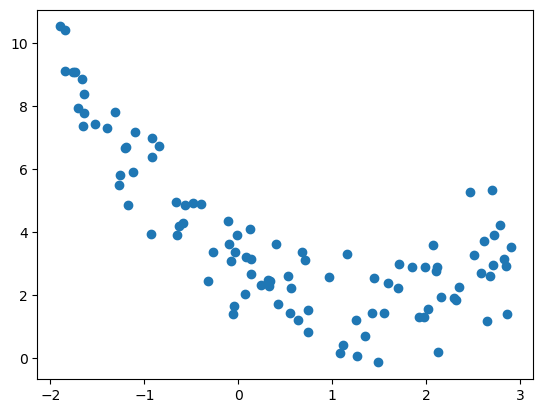

In [47]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

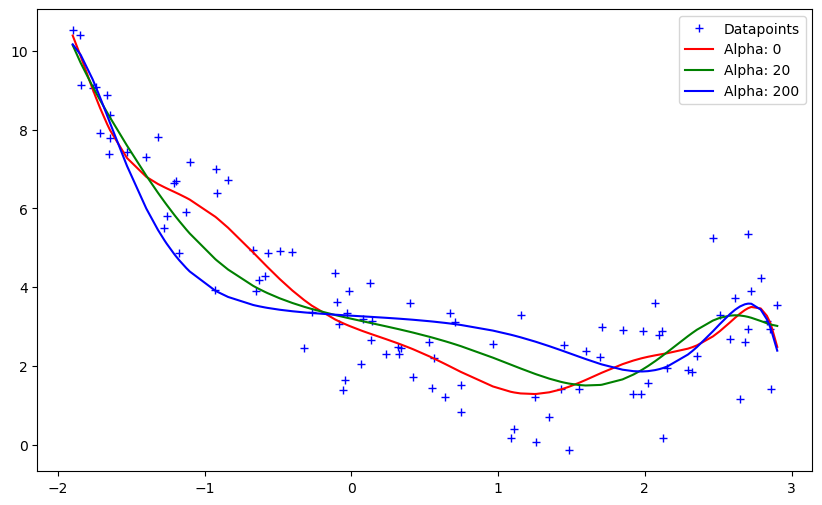

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=10)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression Model
ridge_model = Ridge(alpha=0.003)  # Alpha = Lambda
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Error Calculation
print("R2 score",r2_score(y_test,y_pred))
error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {error}")


R2 score 0.45445677172744214
Mean Squared Error: 2890.370808763644
